In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from random import randint

depth = range(1,100)

df = pd.DataFrame(columns = ['Depth', 'Rock_Type', 'Bed_Num'])
df['Depth']=depth


maxsstthickness = 30
minsstthickness = 10

maxshthickness = 10
minshthickness = 6

x = 1

def gamma(rocktype):
    if rocktype == "Sst":
      return randint(40,100)
    elif rocktype == "Sh":
      return randint(80,140)

def density(rocktype):
    if rocktype == "Sst":
      return (randint(20,33)/10)
    elif rocktype == "Sh":
      return (randint(16,23)/10)

def wellmaker(depth):
    top = 0
    base = 0
    bednum = 1
    while top < depth:
        
        temp_Sstdensity = []
        temp_Shdensity = []
        
        bedSst = randint(minsstthickness,maxsstthickness)
        base = top + bedSst
        df.iloc[top:base,1] = 'Sst'
        df.iloc[top:base,2] = bednum
        bednum += 1
        top += bedSst
        temp_Sstdensity = []
        
        bedSh = randint(minshthickness,maxshthickness)
        base = top + bedSh
        df.iloc[top:base,1] = 'Sh'
        df.iloc[top:base,2] = bednum
        bednum += 1        
        top += bedSh    

        df["GR"] = df.Rock_Type.apply(gamma)
        df["Density"] = df.Rock_Type.apply(density)

        
        
wellmaker(100)


df


,Depth,Rock_Type,Bed_Num,GR,Density
0,1,Sst,1,53,3.1
1,2,Sst,1,97,2.0
2,3,Sst,1,92,2.7
3,4,Sst,1,95,3.1
4,5,Sst,1,91,2.9
...,...,...,...,...,...
94,95,Sh,8,99,2.1
95,96,Sh,8,98,2.2
96,97,Sh,8,80,1.9
97,98,Sh,8,99,1.6


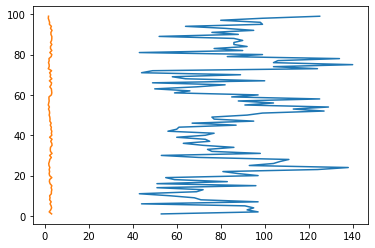

In [38]:
plt.plot(df.GR,df.Depth)
plt.plot(df.Density,df.Depth)